# Decision Tree Regression with Time Series

In [1]:
import graphlab as gl
import datetime as dt
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16.0, 8.0]

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1498547970.log


This non-commercial license of GraphLab Create for academic use is assigned to qop455.iim05g@nctu.edu.tw and will expire on June 23, 2018.


In [2]:
date_feature = gl.SFrame.read_csv("../data/dlt_timeseries.csv")
date_feature['datetime'] = date_feature['datetime'].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

Finished parsing file /Users/jason/Desktop/air-polution/data/dlt_timeseries.csv

Parsing completed. Parsed 100 lines in 0.056036 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/jason/Desktop/air-polution/data/dlt_timeseries.csv

Parsing completed. Parsed 8784 lines in 0.045412 secs.

In [3]:
ts = gl.TimeSeries(date_feature, index='datetime')
ts = ts.dropna()

In [4]:
start = dt.datetime(2016, 8, 5)
end = dt.datetime(2016, 8, 7)

test = ts[start:end]
train = ts[:start].union(ts[end:])

train, test = train.to_sframe(), test.to_sframe()

In [19]:
features = [f for f in ts.column_names() if f not in ['datetime', 'dlt']]

model = gl.regression.create(dataset=train, target='dlt', features=features)
prediction = model.predict(test)
results = model.evaluate(test)
print results

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees regression:

--------------------------------------------------------

Number of examples          : 8290

Number of features          : 24

Number of unpacked features : 24

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 0.021017     | 104.042862         | 15.927168            | 5.577410      | 4.542132        |

| 2         | 0.035267     | 87.677109          | 15.506591            | 5.232879      | 4.452731        |

| 3         | 0.052663     | 87.398193          | 15.715537            | 5.017073      | 4.393557        |

| 4         | 0.066815     | 87.481422          | 16.731632            | 4.874095      | 4.363983        |

| 5         | 0.084242     | 87.324318          | 17.032406            | 4.752943      | 4.366261        |

| 6         | 0.100197     | 87.418526          | 17.271088            | 4.682029      | 4.341290        |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

{'max_error': 10.17231822013855, 'rmse': 3.9746011665648022}


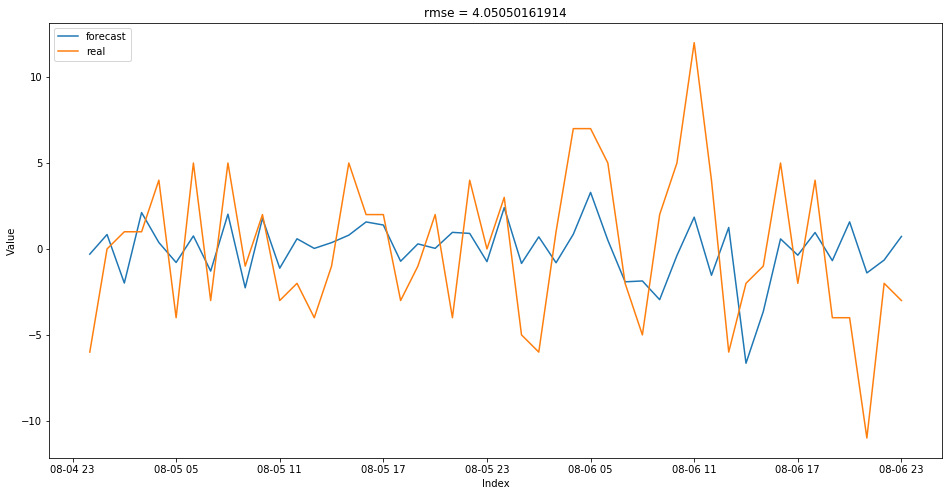

In [8]:
plt.figure()
rmse = results.values()[1]
plt.title('rmse = ' + str(rmse))
plt.xlabel("Index")
plt.ylabel("Value")
plt.plot(test['datetime'], prediction, label='forecast')
plt.plot(test['datetime'], test['dlt'], label='real')
plt.legend(loc='upper left')
plt.show()